**SIMULATED ANNEALING ALGORITHM**

**eil101 Dataset (Optimal Solution - 629)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

**Define Coordinate Class**

In [2]:
class Coordinate:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    #Calculate Euclidean distance between two coordinates
    @staticmethod
    def get_distance(a, b):
        return math.sqrt((a.x - b.x) ** 2 + (a.y - b.y) ** 2)
    
    #Compute total distance for a given route
    @staticmethod
    def get_total_distance(coords):
        dist = sum(Coordinate.get_distance(a, b) for a, b in zip(coords[:-1], coords[1:]))
        dist += Coordinate.get_distance(coords[0], coords[-1])
        return dist

**Load Dataset**

In [3]:
coordinates = [
    (41, 49), (35, 17), (55, 45), (55, 20), (15, 30), (25, 30), (20, 50), (10, 43),
    (55, 60), (30, 60), (20, 65), (50, 35), (30, 25), (15, 10), (30, 5), (10, 20),
    (5, 30), (20, 40), (15, 60), (45, 65), (45, 20), (45, 10), (55, 5), (65, 35),
    (65, 20), (45, 30), (35, 40), (41, 37), (64, 42), (40, 60), (31, 52), (35, 69),
    (53, 52), (65, 55), (63, 65), (2, 60), (20, 20), (5, 5), (60, 12), (40, 25),
    (42, 7), (24, 12), (23, 3), (11, 14), (6, 38), (2, 48), (8, 56), (13, 52),
    (6, 68), (47, 47), (49, 58), (27, 43), (37, 31), (57, 29), (63, 23), (53, 12),
    (32, 12), (36, 26), (21, 24), (17, 34), (12, 24), (24, 58), (27, 69), (15, 77),
    (62, 77), (49, 73), (67, 5), (56, 39), (37, 47), (37, 56), (57, 68), (47, 16),
    (44, 17), (46, 13), (49, 11), (49, 42), (53, 43), (61, 52), (57, 48), (56, 37),
    (55, 54), (15, 47), (14, 37), (11, 31), (16, 22), (4, 18), (28, 18), (26, 52),
    (26, 35), (31, 67), (15, 19), (22, 22), (18, 24), (26, 27), (25, 24), (22, 27),
    (25, 21), (19, 21), (20, 26), (18, 18), (35, 35)
]



**Simulated Annealing Algorithm**

In [4]:
#SA params: 
# T0 = initial temperature
# r = cooling rate 
# max_iterations = max number of iterations

def Simulated(T0=40000, r=0.80, max_iterations=1000):

    #Turns dataset into Coordinate objects
    coords = [Coordinate(x, y) for x, y in coordinates]

    best_route = coords[:]
    best_distance = Coordinate.get_total_distance(coords)

    start_time = time.time()
    T = T0

    for _ in range(max_iterations):
        L = np.random.randint(10, 31)
        for _ in range(L):
            r1, r2 = np.random.randint(0, len(coords), size=2) 
            coords[r1], coords[r2] = coords[r2], coords[r1]

            current_distance = Coordinate.get_total_distance(coords) #swap cities

            #Acceptance probability
            if current_distance < best_distance or np.random.uniform() < np.exp((best_distance - current_distance) / T):
                best_distance = current_distance
                best_route = coords[:]
            else:
                coords[r1], coords[r2] = coords[r2], coords[r1] #revert swap

        T *= r
    
    best_route.append(best_route[0])

    end_time = time.time()
    cpu_time = end_time - start_time

    best_tour_indices = [coordinates.index((c.x, c.y)) for c in best_route]

    print(f"Best Tour: {best_tour_indices}")
    print(f"Best Length: {best_distance:.2f}")
    print(f"CPU Time: {cpu_time:.4f} seconds")

    fig, ax = plt.subplots(figsize=(10, 6))

    for first, second in zip(best_route[:-1], best_route[1:]):
        ax.plot([first.x, second.x], [first.y, second.y], 'b')
    ax.plot([best_route[0].x, best_route[-1].x], [best_route[0].y, best_route[-1].y], 'b')

    for i, c in enumerate(best_route):
        ax.plot(c.x, c.y, 'ro')
        ax.text(c.x + 1, c.y + 1, f'{i}', color='black', fontsize=8)

    ax.set_title('Simulated Annealing for Symmetric TSP')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    plt.show()


Implementations

1st

Best Tour: [89, 10, 47, 16, 60, 15, 90, 99, 84, 92, 97, 36, 41, 14, 56, 12, 52, 26, 50, 19, 29, 69, 87, 30, 68, 27, 25, 20, 71, 73, 55, 74, 21, 40, 42, 13, 37, 85, 43, 86, 1, 72, 39, 57, 6, 81, 17, 59, 95, 93, 96, 94, 91, 58, 98, 88, 9, 31, 65, 78, 2, 76, 75, 100, 5, 4, 83, 45, 35, 46, 7, 44, 82, 51, 32, 80, 8, 70, 64, 34, 33, 77, 28, 79, 67, 23, 54, 24, 38, 66, 22, 3, 53, 11, 49, 0, 61, 18, 48, 63, 62, 89]
Best Length: 956.72
CPU Time: 3.3721 seconds


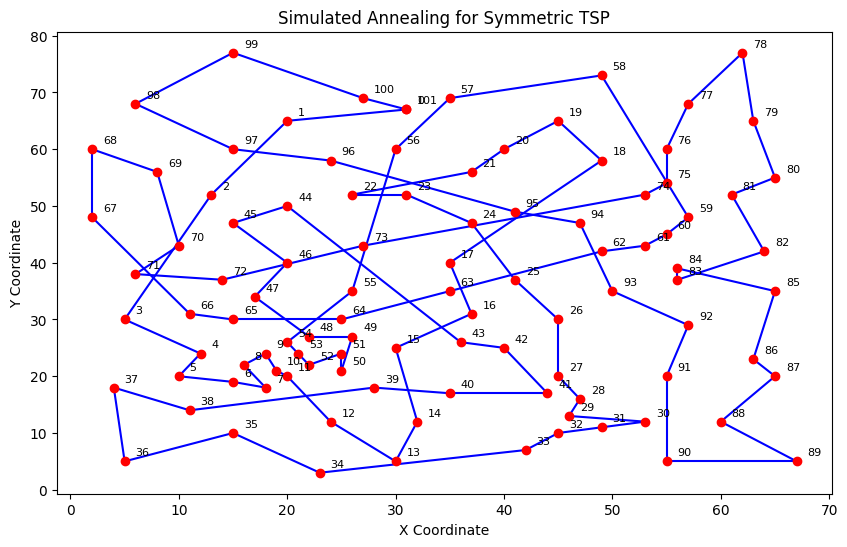

In [5]:
Simulated()

2nd

Best Tour: [28, 23, 79, 67, 2, 75, 25, 57, 12, 94, 91, 96, 1, 73, 71, 3, 54, 24, 38, 66, 22, 74, 55, 53, 33, 34, 64, 70, 8, 78, 76, 11, 52, 100, 68, 87, 9, 31, 19, 65, 63, 48, 35, 46, 47, 81, 6, 51, 26, 27, 49, 80, 32, 0, 69, 30, 59, 83, 16, 60, 15, 90, 99, 84, 97, 36, 56, 40, 21, 72, 20, 39, 93, 95, 58, 92, 98, 4, 82, 7, 44, 85, 43, 13, 37, 45, 18, 10, 62, 89, 61, 17, 41, 42, 14, 86, 5, 88, 29, 50, 77, 28]
Best Length: 974.87
CPU Time: 4.2330 seconds


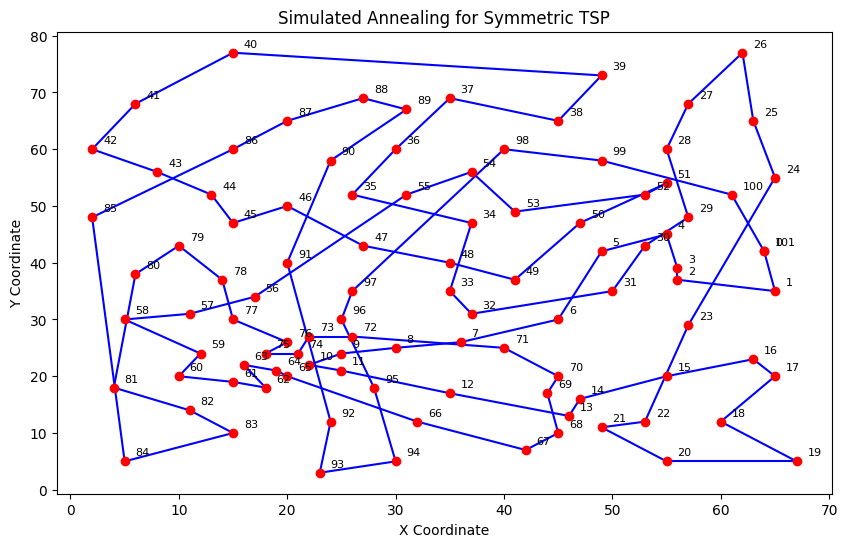

In [6]:
Simulated()

3rd

Best Tour: [40, 22, 66, 38, 74, 21, 73, 55, 24, 54, 23, 28, 33, 34, 64, 70, 53, 3, 20, 25, 75, 76, 2, 77, 78, 32, 0, 29, 69, 30, 68, 51, 87, 6, 61, 10, 62, 89, 31, 63, 48, 35, 18, 9, 19, 65, 50, 8, 80, 49, 52, 39, 93, 95, 98, 92, 84, 97, 96, 91, 36, 90, 99, 41, 42, 14, 56, 86, 58, 5, 88, 59, 15, 85, 37, 13, 43, 60, 16, 83, 4, 94, 1, 71, 72, 12, 57, 100, 11, 79, 67, 27, 26, 82, 44, 7, 45, 47, 46, 81, 17, 40]
Best Length: 953.80
CPU Time: 3.3333 seconds


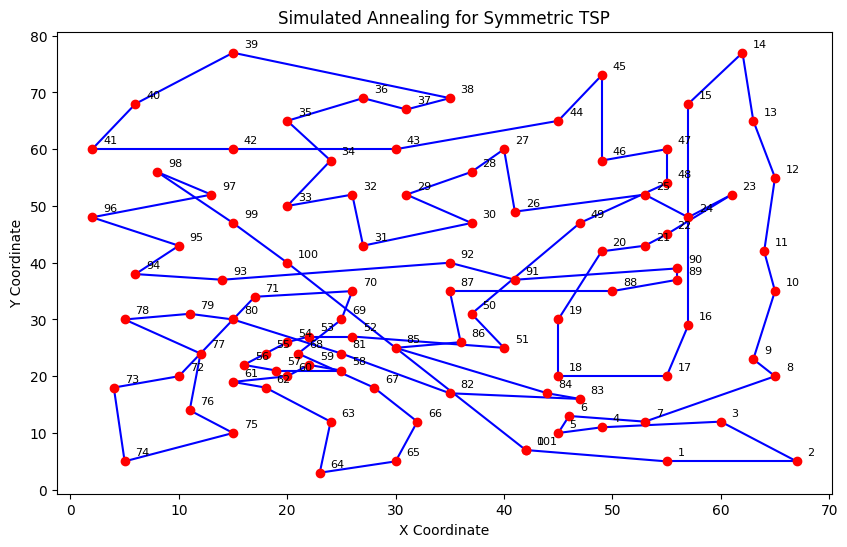

In [7]:
Simulated()

4th

Best Tour: [38, 55, 3, 67, 77, 33, 34, 64, 19, 65, 31, 89, 62, 10, 29, 50, 25, 20, 71, 73, 21, 40, 56, 13, 43, 15, 4, 6, 61, 9, 30, 87, 98, 58, 94, 93, 88, 69, 70, 8, 80, 23, 24, 66, 22, 74, 72, 1, 96, 12, 57, 52, 100, 26, 27, 49, 0, 68, 51, 82, 83, 60, 90, 84, 92, 47, 18, 63, 48, 35, 46, 81, 59, 95, 5, 17, 7, 45, 44, 16, 97, 36, 91, 41, 14, 42, 37, 85, 99, 86, 39, 79, 28, 78, 32, 2, 76, 75, 11, 53, 54, 38]
Best Length: 1013.23
CPU Time: 3.3689 seconds


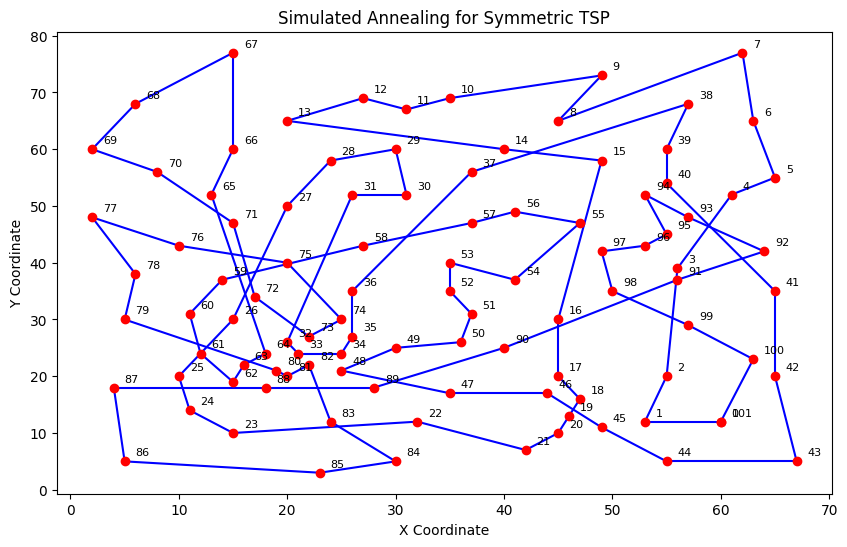

In [8]:
Simulated()

5th

Best Tour: [27, 25, 11, 53, 3, 74, 72, 1, 94, 98, 59, 17, 51, 0, 32, 80, 78, 28, 23, 54, 24, 38, 66, 22, 55, 71, 73, 21, 40, 56, 41, 13, 43, 37, 42, 14, 86, 96, 91, 36, 97, 92, 84, 44, 45, 7, 81, 69, 49, 75, 76, 67, 2, 8, 50, 29, 89, 9, 61, 87, 100, 52, 5, 95, 93, 57, 39, 20, 79, 77, 33, 70, 64, 34, 19, 65, 31, 62, 63, 10, 18, 48, 35, 46, 47, 6, 30, 68, 26, 88, 58, 90, 15, 60, 4, 82, 83, 16, 85, 99, 12, 27]
Best Length: 911.47
CPU Time: 3.8982 seconds


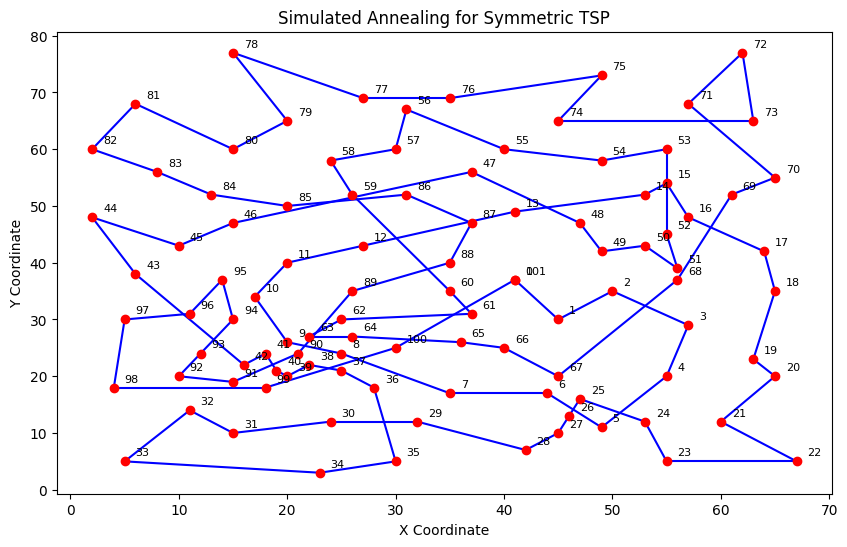

In [9]:
Simulated()

6th

Best Tour: [59, 82, 83, 44, 45, 35, 18, 10, 9, 49, 23, 28, 77, 80, 32, 5, 84, 90, 15, 85, 16, 61, 31, 29, 69, 30, 95, 98, 92, 97, 36, 91, 93, 100, 50, 8, 34, 33, 67, 79, 75, 76, 2, 78, 70, 64, 65, 19, 0, 68, 27, 11, 53, 54, 24, 3, 20, 25, 26, 89, 62, 63, 48, 46, 17, 12, 1, 73, 21, 72, 57, 52, 39, 71, 55, 74, 38, 66, 22, 40, 56, 14, 42, 13, 37, 43, 99, 41, 86, 96, 94, 58, 60, 4, 7, 81, 47, 6, 87, 51, 88, 59]
Best Length: 1006.32
CPU Time: 4.1090 seconds


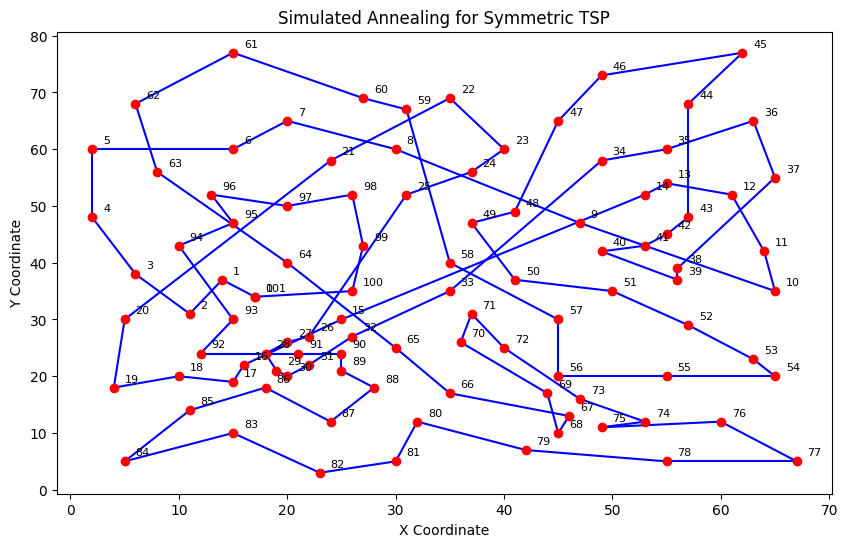

In [10]:
Simulated()

7th

Best Tour: [18, 48, 35, 45, 85, 37, 40, 21, 73, 20, 39, 25, 27, 87, 61, 9, 69, 0, 68, 88, 51, 47, 46, 7, 97, 36, 99, 13, 43, 90, 84, 15, 60, 17, 81, 6, 100, 52, 57, 12, 96, 91, 98, 4, 83, 16, 44, 82, 59, 86, 72, 71, 22, 66, 24, 54, 23, 28, 11, 79, 67, 76, 2, 78, 77, 33, 53, 38, 55, 74, 3, 75, 32, 80, 50, 49, 1, 56, 14, 42, 41, 26, 19, 65, 70, 64, 34, 8, 95, 92, 58, 94, 93, 5, 30, 29, 31, 89, 62, 63, 10, 18]
Best Length: 1039.54
CPU Time: 2.6678 seconds


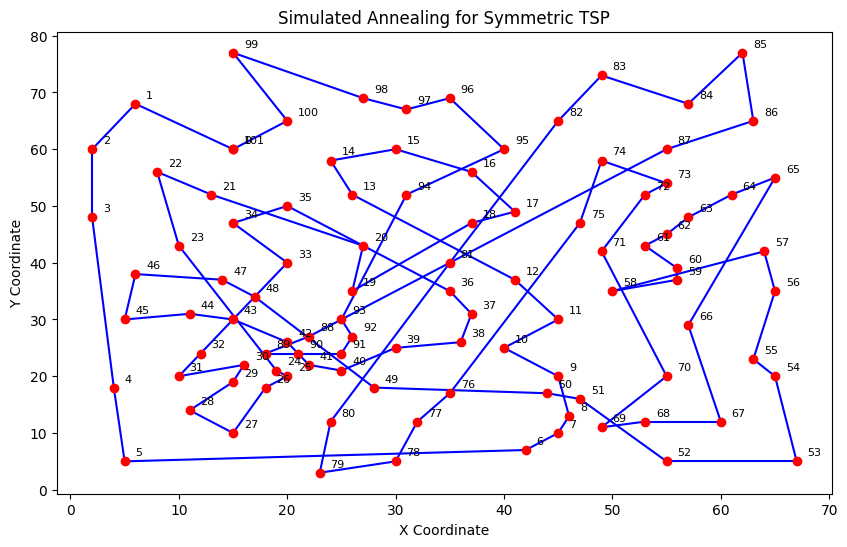

In [11]:
Simulated()

8th

Best Tour: [23, 38, 66, 22, 21, 40, 56, 86, 1, 39, 75, 76, 2, 49, 0, 18, 48, 35, 83, 60, 99, 98, 95, 5, 88, 51, 6, 87, 61, 81, 7, 82, 15, 85, 37, 43, 90, 16, 44, 45, 46, 47, 52, 57, 72, 73, 74, 55, 3, 25, 68, 9, 89, 62, 10, 63, 31, 78, 28, 53, 20, 14, 42, 13, 41, 71, 24, 54, 79, 67, 11, 12, 96, 58, 94, 93, 27, 32, 80, 26, 100, 91, 36, 97, 92, 84, 4, 59, 17, 30, 69, 29, 19, 50, 8, 70, 65, 64, 34, 33, 77, 23]
Best Length: 1057.58
CPU Time: 2.3804 seconds


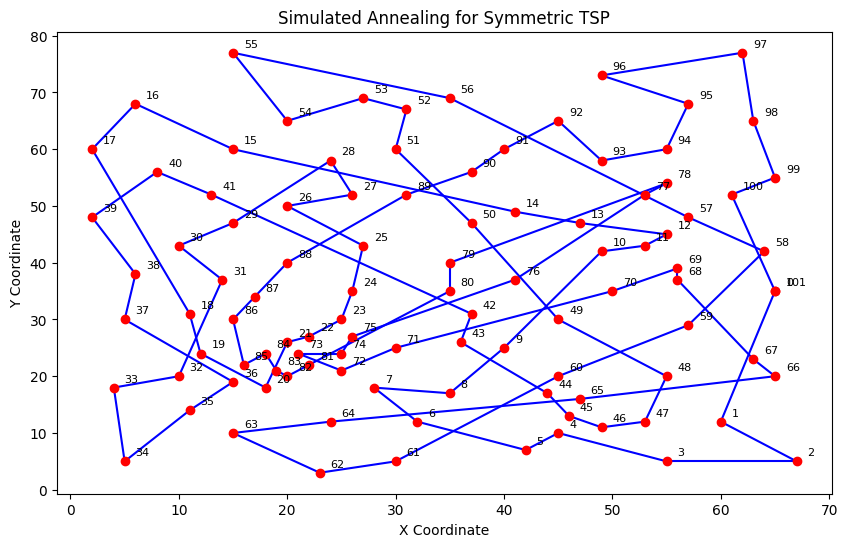

In [12]:
Simulated()

9th

Best Tour: [51, 17, 59, 82, 7, 44, 16, 83, 98, 94, 96, 86, 56, 14, 42, 37, 13, 41, 99, 90, 84, 97, 36, 91, 58, 95, 5, 93, 1, 21, 73, 74, 55, 3, 53, 23, 28, 76, 2, 80, 8, 65, 64, 70, 34, 32, 20, 71, 72, 39, 25, 50, 19, 31, 63, 48, 35, 45, 85, 43, 15, 57, 11, 33, 77, 78, 75, 26, 68, 0, 49, 67, 79, 54, 24, 38, 66, 22, 40, 12, 92, 60, 4, 81, 47, 46, 69, 29, 89, 62, 10, 18, 6, 88, 100, 52, 27, 30, 9, 61, 87, 51]
Best Length: 963.99
CPU Time: 3.1013 seconds


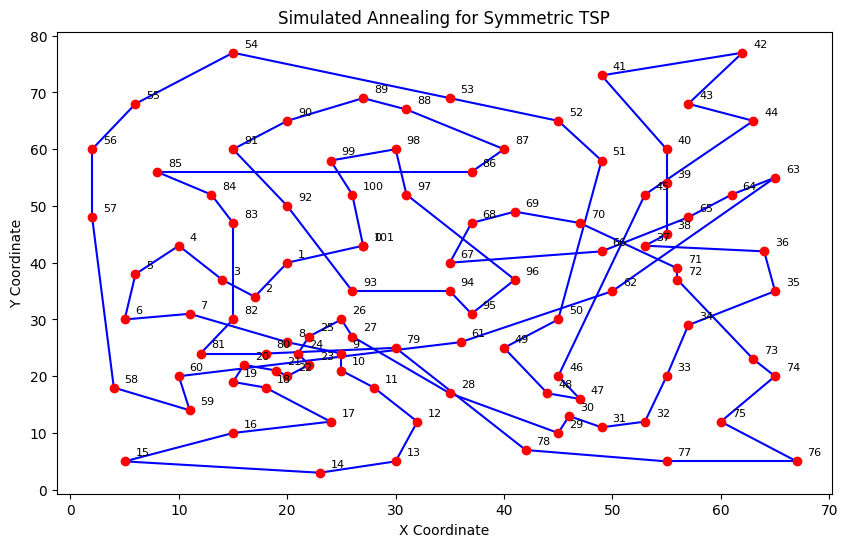

In [13]:
Simulated()

10th

Best Tour: [71, 28, 33, 34, 64, 70, 19, 43, 37, 85, 16, 45, 10, 89, 9, 61, 88, 91, 41, 42, 13, 97, 36, 1, 72, 20, 3, 24, 54, 53, 23, 76, 46, 35, 48, 63, 62, 31, 29, 30, 51, 59, 4, 82, 7, 44, 90, 99, 14, 40, 56, 86, 96, 57, 79, 67, 75, 100, 58, 84, 92, 98, 26, 0, 68, 69, 17, 83, 15, 60, 95, 5, 93, 94, 12, 52, 27, 49, 32, 80, 50, 87, 6, 81, 47, 18, 65, 8, 77, 78, 2, 11, 25, 39, 73, 21, 22, 66, 38, 55, 74, 71]
Best Length: 1131.56
CPU Time: 2.7099 seconds


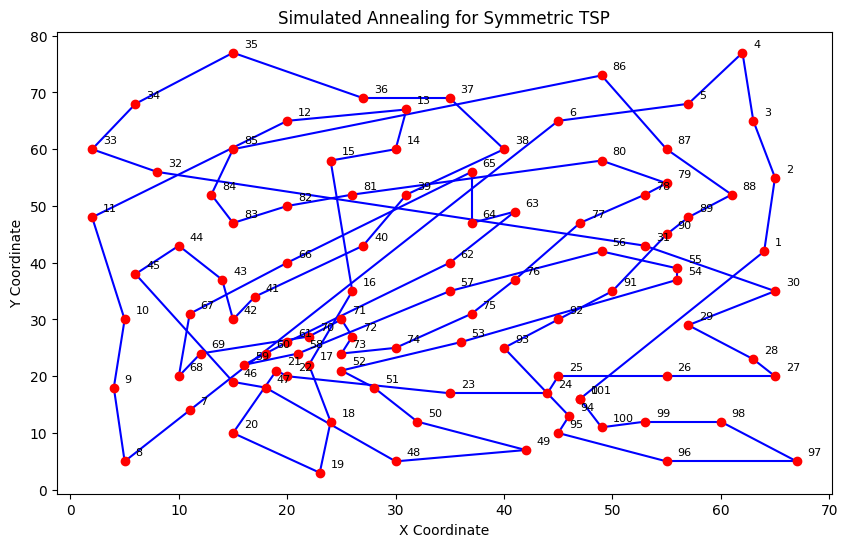

In [14]:
Simulated()